In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import lsst.sims.skybrightness_pre as sb
import healpy as hp
import lsst.sims.skybrightness as sb1
from lsst.sims.utils import m5_flat_sed

In [2]:
sm = sb.SkyModelPre()
mjd0 = 59580.035 #60364.0208333333#59760. #60364.0208333333
mags = sm.returnMags(mjd0)

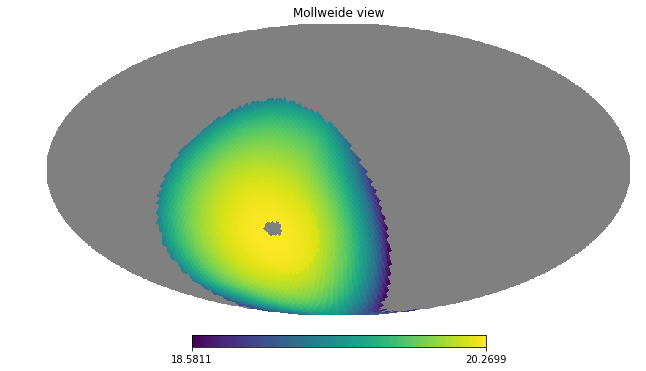

In [3]:
hp.mollview(mags['r'])

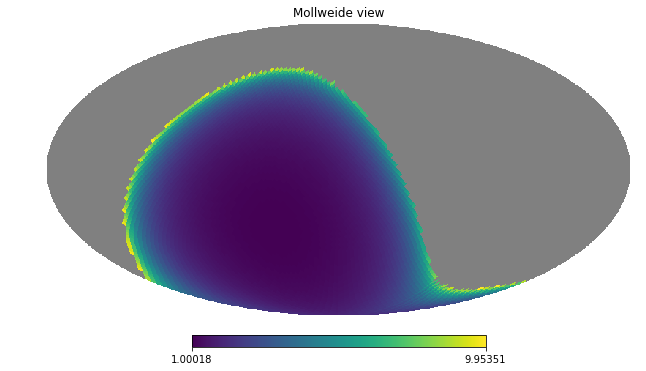

In [4]:
am = sm.returnAirmass(mjd0)
hp.mollview(am)

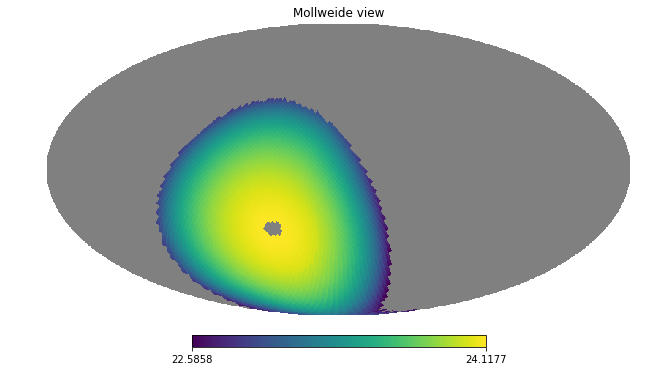

In [5]:
good = np.where(mags['r'] != hp.UNSEEN)
m5 = mags['r']*0 + hp.UNSEEN
m5[good] = m5_flat_sed('r', mags['r'][good], 0.7*np.power(am[good], 0.6), 30., am[good])

hp.mollview(m5)

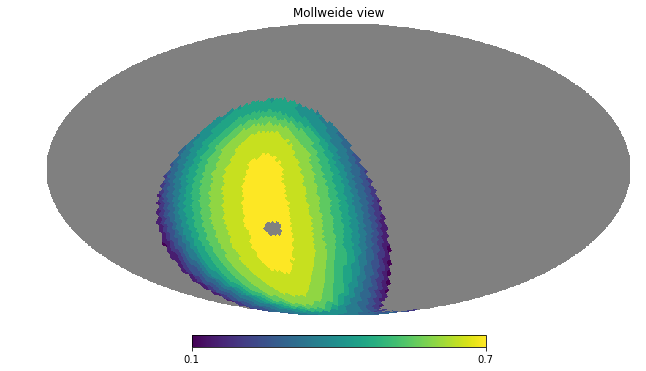

In [6]:
m52per = sb.M5percentiles()
percentiles = m52per.m5map2percentile(m5, filtername='r')
hp.mollview(percentiles)

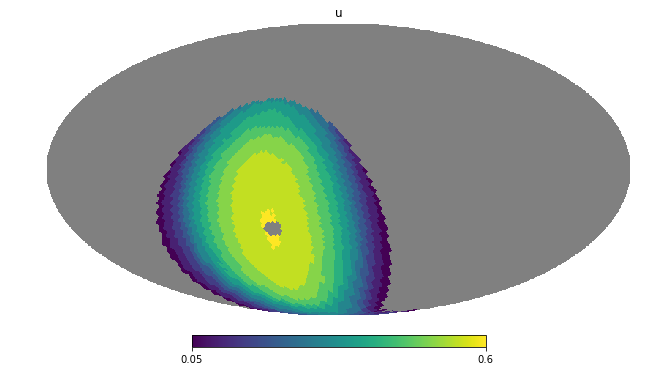

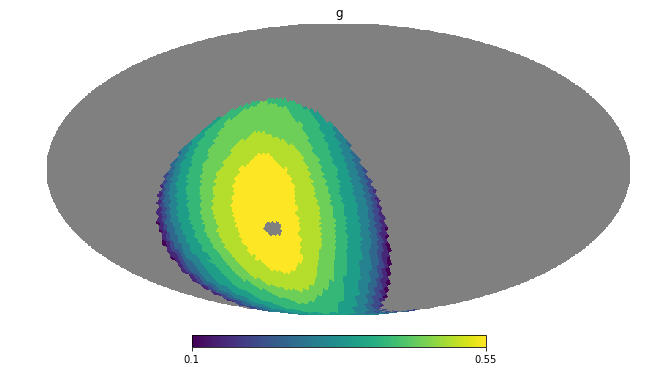

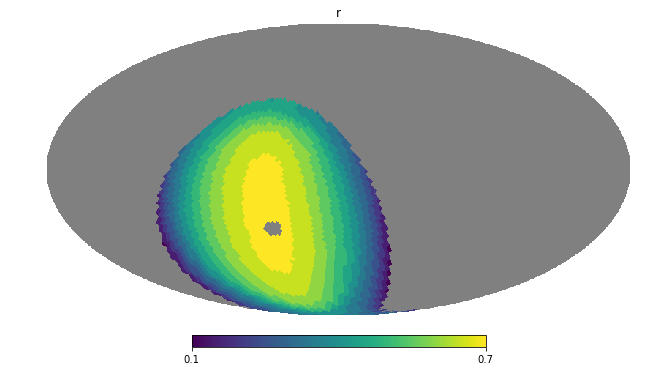

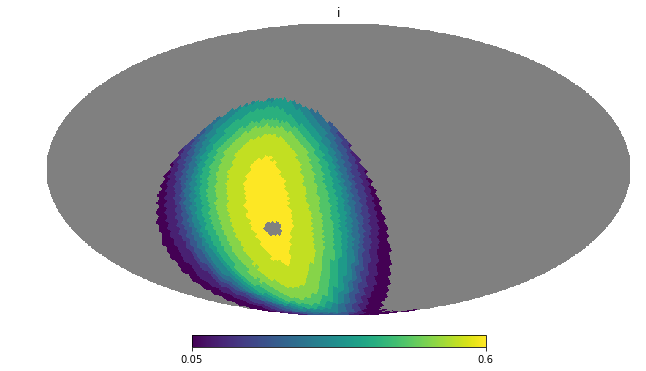

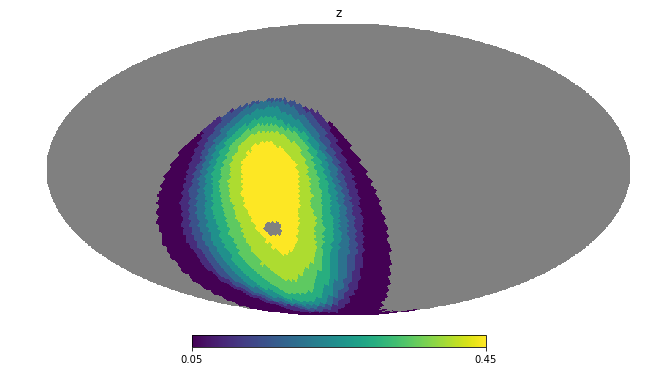

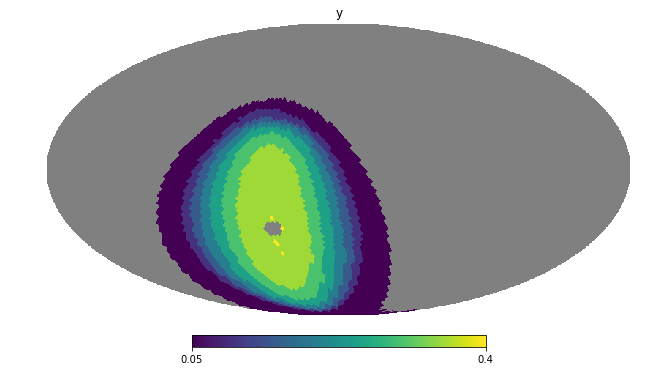

In [7]:
for fn in ['u','g','r','i','z','y']:
    good = np.where(mags[fn] != hp.UNSEEN)
    m5 = mags[fn]*0 + hp.UNSEEN
    m5[good] = m5_flat_sed(fn, mags[fn][good], 0.7*np.power(am[good], 0.6), 30., am[good])
    percentiles = m52per.m5map2percentile(m5, filtername=fn)
    hp.mollview(percentiles, title=fn)

-33.6015728106


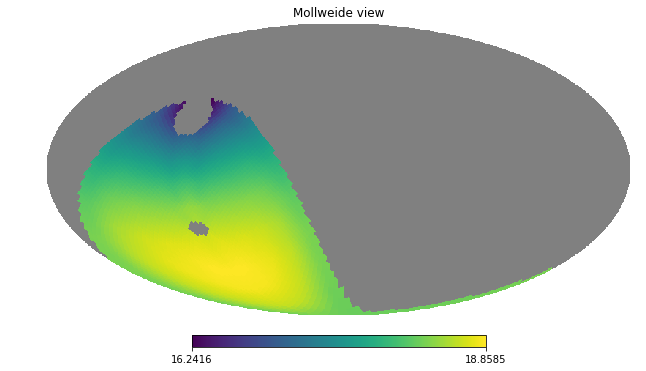

In [8]:
mjd=mjd0+15.1
mags = sm.returnMags(mjd)
am = sm.returnAirmass(mjd)
hp.mollview(mags['r'])
print(np.degrees(sm.returnSunMoon(mjd)['sunAlt']))

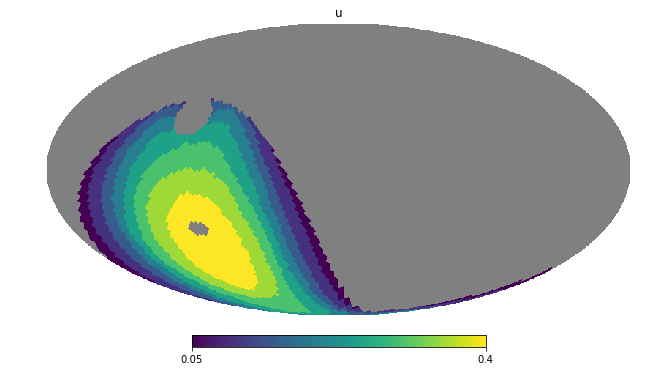

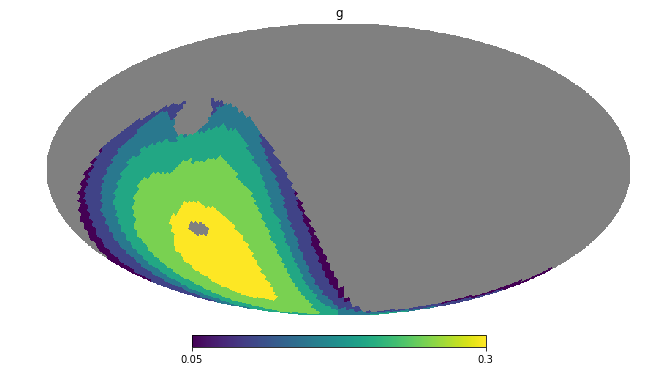

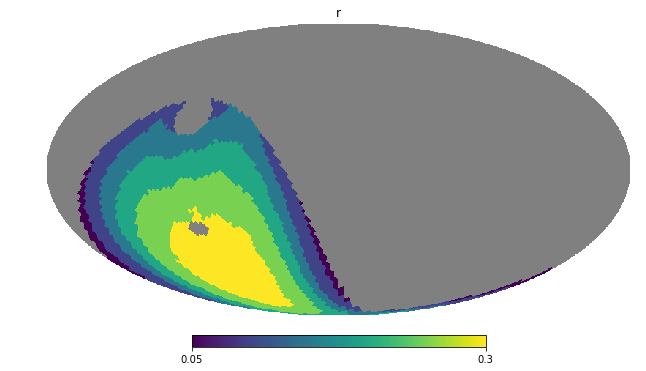

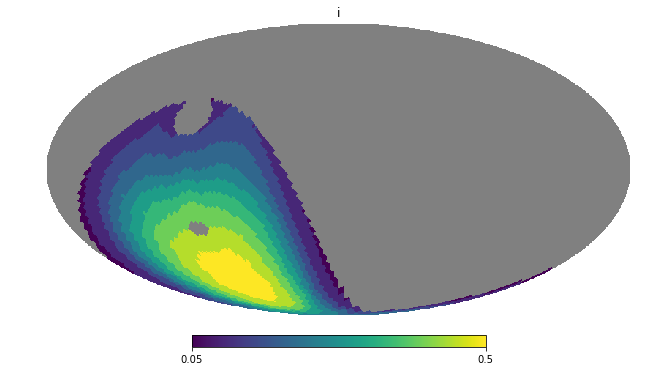

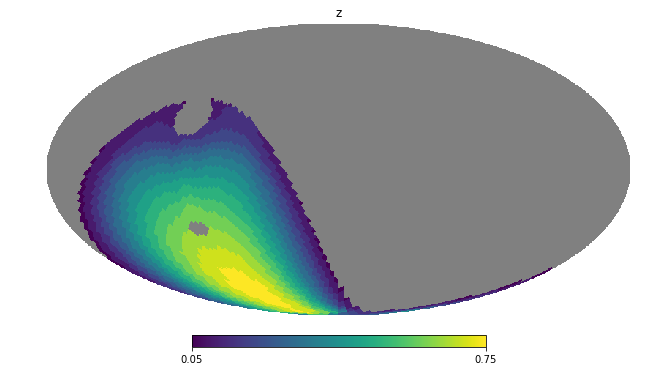

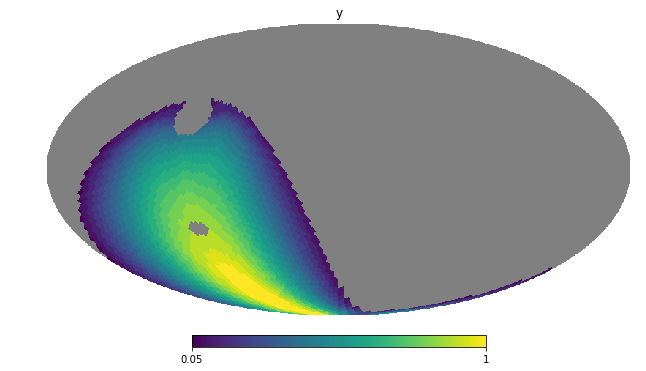

In [9]:
for fn in ['u','g','r','i','z','y']:
    good = np.where(mags[fn] != hp.UNSEEN)
    m5 = mags[fn]*0 + hp.UNSEEN
    m5[good] = m5_flat_sed(fn, mags[fn][good], 0.7*np.power(am[good], 0.6), 30., am[good])
    percentiles = m52per.m5map2percentile(m5, filtername=fn)
    hp.mollview(percentiles, title=fn)

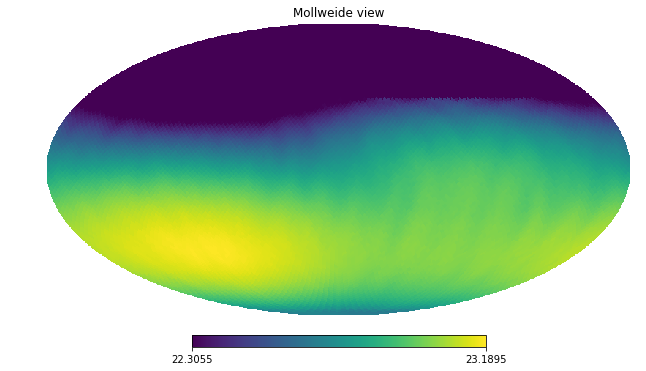

In [19]:
# Now let's make a map at a given percentile
atper = m52per.percentile2m5map(.2, filtername='r')
good = np.where(atper != 0)[0]
hp.mollview(atper, min=atper[good.min()])

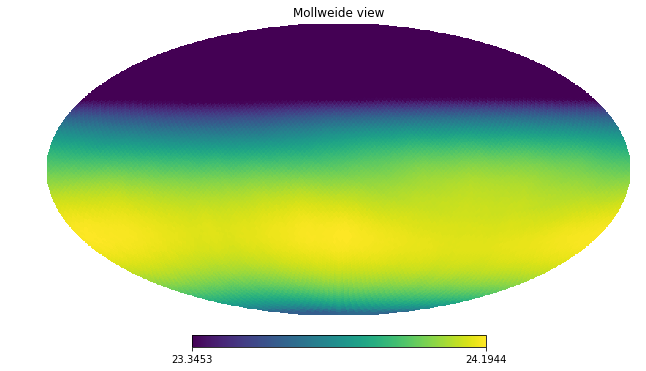

In [20]:
# Now let's make a map at a given percentile
atper = m52per.percentile2m5map(.75, filtername='r')
good = np.where(atper != 0)[0]
hp.mollview(atper, min=atper[good.min()])